In [2]:
# from https://www.scikit-yb.org/en/latest/api/cluster/elbow.html#: \
# ~:text=The%20elbow%20method%20runs%20k,point%20to%20its%20assigned%20center.

#sudo -S pip3 install scikit-learn
#!sudo -S pip3 install matplotlib

In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics

from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8]) 
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]) 
X = np.array(list(zip(x1, x2)))
X.shape

(17, 2)

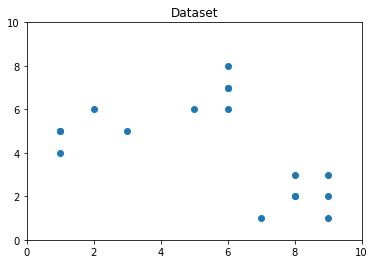

In [5]:
#Visualizing the data 
plt.plot() 
plt.xlim([0, 10]) 
plt.ylim([0, 10]) 
plt.title('Dataset') 
plt.scatter(x1, x2) 
plt.show() 

In [6]:
distortions = [] 
inertias = [] 
dist_for_k = {} 
inertias_for_k = {} 
K = range(1,6) 

In [7]:
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
#     .fit(X) here is the calculation of the squared distances
    kmeanModel.fit(X)     
     
# sum of squared distances form centroids:
# cdist form scipy is just the euclidean distance:
    distortion = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]
    
    distortions.append(distortion) 

#   Sum of squared distances of samples to their closest cluster center.
    inertias.append(kmeanModel.inertia_) 
  
    dist_for_k[k] = distortion
    inertias_for_k[k] = kmeanModel.inertia_ 

In [20]:
for key,val in dist_for_k.items(): 
	print(str(key)+' : '+str(val)) 

1 : 3.4577032384495707
2 : 1.7687413573405673
3 : 0.8819889697423957
4 : 0.7587138847606585
5 : 0.6635212812400347


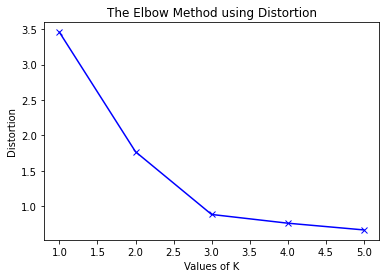

In [21]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [22]:
for key, val in inertias_for_k.items():
    print(key, ":", val)

1 : 217.64705882352948
2 : 68.42857142857142
3 : 16.228571428571428
4 : 12.695238095238095
5 : 9.600000000000001


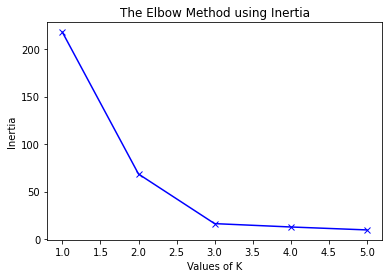

In [23]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [24]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X)

KMeans(n_clusters=3)

In [25]:
for x, label in zip(X, kmeanModel.labels_):
    print(x, ":", label)

[3 5] : 1
[1 4] : 1
[1 5] : 1
[2 6] : 1
[1 5] : 1
[6 8] : 2
[6 6] : 2
[6 7] : 2
[5 6] : 2
[6 7] : 2
[7 1] : 0
[8 2] : 0
[9 1] : 0
[8 2] : 0
[9 3] : 0
[9 2] : 0
[8 3] : 0


In [26]:
# !sudo -S pip3 install pandas
import pandas as pd

In [27]:
# dictt = {x:label for x,label in zip(X,kmeanModel.labels_)}
# # pd.DataFrame({
# dictt

In [28]:
df = pd.DataFrame(X)

In [29]:
df['labels'] = kmeanModel.labels_

In [30]:
df

,0,1,labels
0,3,5,1
1,1,4,1
2,1,5,1
3,2,6,1
4,1,5,1
5,6,8,2
6,6,6,2
7,6,7,2
8,5,6,2
9,6,7,2


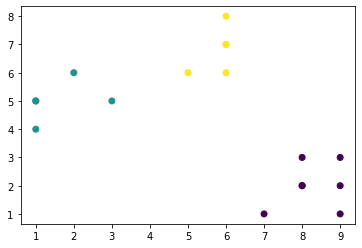

In [31]:
plt.scatter(x=df[0], y=df[1], c=df['labels'])